In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 

In [3]:
athleteData = pd.read_csv('athlete_events.csv')
athleteData.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
print(athleteData.dtypes)
print("\nTotal number of data: ", len(athleteData))

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

Total number of data:  271116


In [5]:
someDF = pd.DataFrame(athleteData[['Age', 'Height', 'Weight']])
someDF.head()

,Age,Height,Weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
2,24.0,NaN,NaN
3,34.0,NaN,NaN
4,21.0,185.0,82.0


In [6]:
print("Number of Countries :", len(athleteData["NOC"].unique()))
print("Number of Events :", len(athleteData["Event"].unique()))
print("Number of Sports :", len(athleteData["Sport"].unique()))
print("Number of Olympic Editions :", len(athleteData["Year"].unique()))
print("Number of Seasons :", len(athleteData["Season"].unique()))

Number of Countries : 230
Number of Events : 765
Number of Sports : 66
Number of Olympic Editions : 35
Number of Seasons : 2


In [7]:
# Season = pd.DataFrame(athleteData['Season'])
# a=0
# b=0
# i=0
# for i in Season:
#     if Season[i['Season'].str.contains('Summer', na=False):
#         a++
#     elif Season[i['Season'].str.contains('Winter', na=False):
#         b++
#     i++
# print(a)
# print(b)

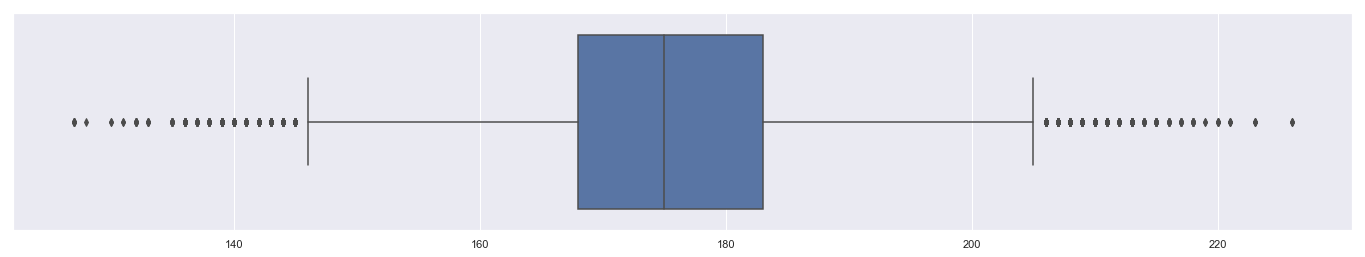

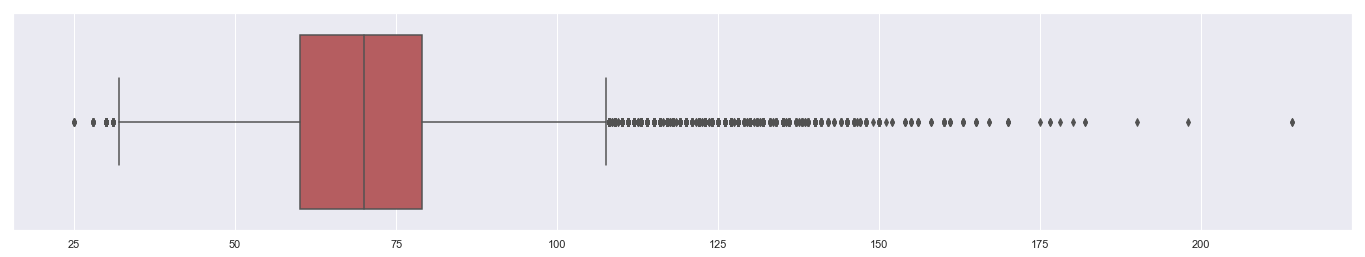

In [8]:
Height_old = pd.DataFrame(athleteData['Height'])
Height = Height_old.dropna()
f, axes = plt.subplots(1, 1, figsize=(24, 4))
sb.boxplot(Height, orient = "h")

Weight_old = pd.DataFrame(athleteData['Weight'])
Weight = Weight_old.dropna()
f, axes = plt.subplots(1, 1, figsize=(24, 4))
sb.boxplot(Weight, orient = "h", color = 'r')

C:\Users\tkjie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


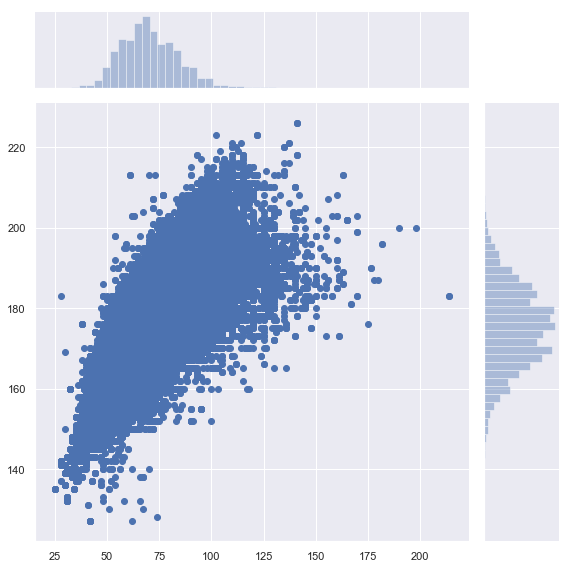

In [9]:
sb.jointplot(x = Weight_old, y = Height_old, height = 8)

In [10]:
Medals = pd.DataFrame(athleteData['Medal'])
Medals_new = Medals.dropna()
Medals_new.head()
print("The number of medals won: ", len(Medals_new))

The number of medals won:  39783


Number of Olympic Editions : 35
1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7480
1936     7401
1956     6434
1924     5693
1928     5574
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1932     3321
1994     3160
1908     3101
1900     1936
1906     1733
1904     1301
1896      380
Name: Year, dtype: int64

Year with the No. of Athletes


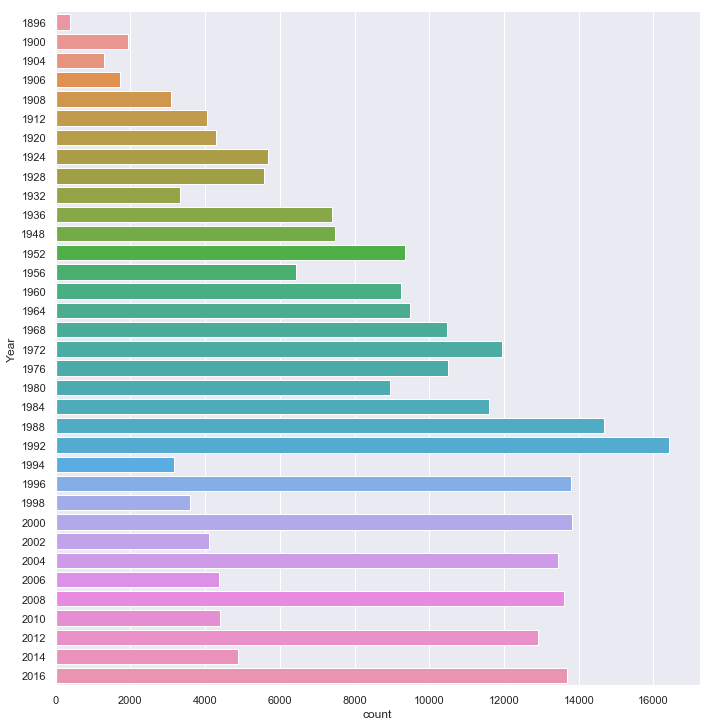

In [11]:
print("Number of Olympic Editions :", len(athleteData["Year"].unique()))
# the unique function provides the unique and specific variables and columns
print(athleteData["Year"].value_counts())
print("\nYear with the No. of Athletes")
sb.catplot(y = "Year", data = athleteData, kind = "count", height = 10)

In [12]:
DF_with_HeightnWeight_old = pd.DataFrame(athleteData[['ID', 'Name', 'Height', 'Weight', 'Medal']])
DF_with_HeightnWeight = DF_with_HeightnWeight_old.dropna()
DF_with_HeightnWeight.head()

,ID,Name,Height,Weight,Medal
40,16,Juhamatti Tapio Aaltonen,184.0,85.0,Bronze
41,17,Paavo Johannes Aaltonen,175.0,64.0,Bronze
42,17,Paavo Johannes Aaltonen,175.0,64.0,Gold
44,17,Paavo Johannes Aaltonen,175.0,64.0,Gold
48,17,Paavo Johannes Aaltonen,175.0,64.0,Gold


Gold      10168
Bronze    10154
Silver     9874
Name: Medal, dtype: int64


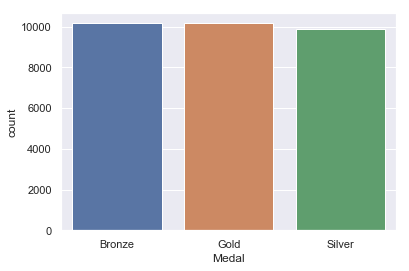

In [13]:
Height_new = pd.DataFrame(DF_with_HeightnWeight['Height'])
Medals_new = pd.DataFrame(DF_with_HeightnWeight['Medal'])

print(DF_with_HeightnWeight["Medal"].value_counts())
sb.countplot(DF_with_HeightnWeight["Medal"])

In [14]:
print("The number of athletes with medals:", len(DF_with_HeightnWeight["Name"].unique()))

The number of athletes with medals: 20745


The number of medals won in each year.


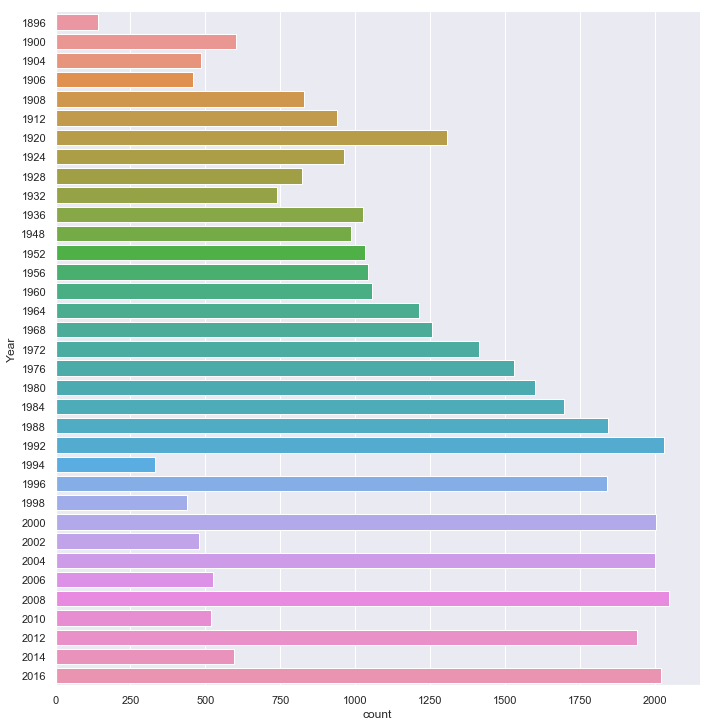

In [23]:
DF_SeasonNMedal_old = pd.DataFrame(athleteData[['Year', 'Medal']])
DF_SeasonNMedal = DF_SeasonNMedal_old.dropna()
print("The number of medals won in each year.")
sb.catplot(y = "Year", data = DF_SeasonNMedal, kind = "count", height = 10)

In [22]:
nocData = pd.read_csv('noc_regions.csv')
nocData.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [20]:
nocData.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,MTN,Germany,Crete
freq,1,4,1
